# Hierarchical and parallel computing

Solver "workflow"

* Asynchronous and "re-distributable" modes

* Restarts and auto-saved state

In [1]:
from mystic.solvers import PowellDirectionalSolver
from mystic.termination import VTR
from mystic.models import rosen
from mystic.solvers import LoadSolver
import os

solver = PowellDirectionalSolver(3)
solver.SetRandomInitialPoints([0.,0.,0.],[10.,10.,10.])
term = VTR()
tmpfile = 'mysolver.pkl'
solver.SetSaveFrequency(10, tmpfile)
solver.Solve(rosen, term)
x = solver.bestSolution
y = solver.bestEnergy
_solver = LoadSolver(tmpfile)
os.remove(tmpfile)
assert all(x == _solver.bestSolution)
assert y == _solver.bestEnergy

* Database integration and results caching/kriging

See the `klepto` package, which can save pickled objects to a databases or "file-based" databases. `klepto` also provides a caching decorator that integrates well with `mystic`.

* Extension to parallel computing

In [2]:
from multiprocess import Pool
#from pathos.multiprocessing import ProcessPool as Pool
from numpy.random import random
from mystic.solvers import fmin_powell as solver
from mystic.models import zimmermann as model

dim = 2
tries = 20

def helper(solver, model):
    def f(x0, *args, **kwds):
        return solver(model, x0, disp=False, full_output=True, *args, **kwds)[:2]
    return f

# soln = solver(model, 10*random((dim)), disp=False, full_output=True)


if __name__ == '__main__':
    from multiprocess import freeze_support
    freeze_support()

    p = Pool()
    uimap = getattr(p, 'uimap',None) or p.imap_unordered
    res = uimap(helper(solver, model), 10*random((tries,dim)))

    for soln in res:
        print("%s: %s" % (soln[1],soln[0]))
    
    p.close()
    p.join()

1.4659582087: [ 3.34775148  4.18629032]
0.193327105757: [ 6.7244221  2.0822508]
1.33885300921: [ 3.01822826  4.64291873]
0.760952173875: [ 2.39822564  5.84082219]
0.0587099968253: [ 6.91729161  2.02399839]
1.51149766463: [ 3.80983951  3.67866283]
1.05044209266: [ 2.63748194  5.31207597]
1.33132426516: [ 3.00437784  4.66429789]
1.33332683652: [ 3.00802689  4.65864627]
0.69680084903: [ 2.35470977  5.94848938]
1.33871952338: [ 3.01797952  4.64330095]
0.00659288011689: [ 6.99075187  2.00265525]
1.48159717956: [ 3.41747159  4.10093123]
0.968258751794: [ 2.56069562  5.47104562]
1.33002776926: [ 3.0020286   4.66794364]
1.48828812569: [ 4.05846284  3.45324903]
0.306980732124: [ 6.55763518  2.13538409]
0.12280186906: [ 6.82605245  2.05114568]
1.12993980546: [ 2.72129105  5.14876914]
1.43725674236: [ 3.24808106  4.31466219]


In [3]:
%matplotlib notebook

Powell's Method
[id: 0] Generation 0 has Chi-Squared: 5077742.293533
[id: 0] Generation 0 has fit parameters:
 [0.0, -150.0, -150.0, -150.0, -225.0, 0.0, 0.0, 0.0, 1.0]
[id: 0] Generation 10 has Chi-Squared: 1383.107884
[id: 0] Generation 20 has Chi-Squared: 413.646137
[id: 0] Generation 30 has Chi-Squared: 326.235898
STOP("NormalizedChangeOverGeneration with {'generations': 10, 'tolerance': 0.0001}")
                                                                                                                                                                                                                                                                                                                                                                                                      [id: 1] Generation 0 has Chi-Squared: 3348859.352757
[id: 1] Generation 0 has fit parameters:
 [0.0, -150.0, -150.0, -150.0, -75.0, 0.0, 0.0, 0.0, 1.0]
[id: 1] Generation 10 has Chi-Squared: 627.170026
[id

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

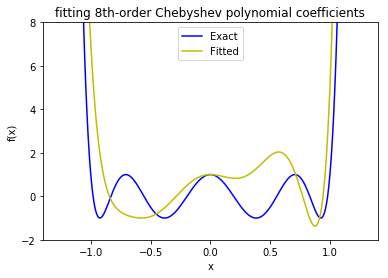

In [4]:
"""
Example:
    - Solve 8th-order Chebyshev polynomial coefficients with Powell's method.
    - Uses LatticeSolver to provide 'pseudo-global' optimization
    - Plot of fitting to Chebyshev polynomial.

Demonstrates:
    - standard models
    - minimal solver interface
"""
# the Buckshot solver
from mystic.solvers import LatticeSolver

# Powell's Directonal solver
from mystic.solvers import PowellDirectionalSolver

# Chebyshev polynomial and cost function
from mystic.models.poly import chebyshev8, chebyshev8cost
from mystic.models.poly import chebyshev8coeffs

# if available, use a pathos worker pool
try:
    #from pathos.pools import ProcessPool as Pool
    from pathos.pools import ParallelPool as Pool
except ImportError:
    from mystic.pools import SerialPool as Pool

# tools
from mystic.termination import NormalizedChangeOverGeneration as NCOG
from mystic.math import poly1d
from mystic.monitors import VerboseLoggingMonitor
from mystic.tools import getch
import pylab
pylab.ion()

# draw the plot
def plot_exact():
    pylab.title("fitting 8th-order Chebyshev polynomial coefficients")
    pylab.xlabel("x")
    pylab.ylabel("f(x)")
    import numpy
    x = numpy.arange(-1.2, 1.2001, 0.01)
    exact = chebyshev8(x)
    pylab.plot(x,exact,'b-')
    pylab.legend(["Exact"])
    pylab.axis([-1.4,1.4,-2,8],'k-')
    pylab.draw()
    return

# plot the polynomial
def plot_solution(params,style='y-'):
    import numpy
    x = numpy.arange(-1.2, 1.2001, 0.01)
    f = poly1d(params)
    y = f(x)
    pylab.plot(x,y,style)
    pylab.legend(["Exact","Fitted"])
    pylab.axis([-1.4,1.4,-2,8],'k-')
    pylab.draw()
    return

# add some information as constraints
from mystic.constraints import integers
@integers()
def constraints(x):
    x[-1] = 1
    return x


if __name__ == '__main__':
    from pathos.helpers import freeze_support
    freeze_support() # help Windows use multiprocessing

    print("Powell's Method")
    print("===============")

    # dimensional information
    from mystic.tools import random_seed
    random_seed(123)
    ndim = 9
    npts = 32

    # draw frame and exact coefficients
    plot_exact()

    # configure monitor
    stepmon = VerboseLoggingMonitor(1,10)

    # use lattice-Powell to solve 8th-order Chebyshev coefficients
    solver = LatticeSolver(ndim, npts)
    solver.SetNestedSolver(PowellDirectionalSolver)
    solver.SetMapper(Pool().map)
    solver.SetGenerationMonitor(stepmon)
    solver.SetStrictRanges(min=[-300]*ndim, max=[300]*ndim)
    solver.SetConstraints(constraints)
    solver.Solve(chebyshev8cost, NCOG(1e-4), disp=1)
    solution = solver.Solution()

    # write 'convergence' support file
    from mystic.munge import write_support_file
    write_support_file(solver._stepmon) #XXX: only saves the 'best'

    # use pretty print for polynomials
    print(poly1d(solution))

    # compare solution with actual 8th-order Chebyshev coefficients
    print("\nActual Coefficients:\n %s\n" % poly1d(chebyshev8coeffs))

    # plot solution versus exact coefficients
    plot_solution(solution)
    #getch()

* Automated dimensional reduction

`mystic` provides termination conditions such as `CollapseAt` and `CollapseAs` that look for solution vectors that hover around a single value, or start to track other solution vectors, or otherwise.  When a collapse conditions is met, the solver terminates, and applys a constraint that reduces the dimensionality of the solution vectors. Upon restart, the solver works on a smaller list of paramaters.

Hierarchical and meta-solvers:

* "Nesting" solvers

* Ensemble solvers

* Global search

In [5]:
!rm log.txt

In [6]:
"""
Uses Ensemble Solvers to provide 'pseudo-global' search.

"""
from mystic.search import Searcher


if __name__ == '__main__':
    # if available, use a multiprocessing worker pool
    try:
        from pathos.helpers import freeze_support
        freeze_support()
        from pathos.pools import ProcessPool as Pool
    except ImportError:
        from mystic.pools import SerialPool as Pool

    # tools
    from mystic.termination import VTR, ChangeOverGeneration as COG
    from mystic.termination import NormalizedChangeOverGeneration as NCOG
    from mystic.monitors import LoggingMonitor, VerboseMonitor, Monitor
    from klepto.archives import dir_archive

    stop = NCOG(1e-4)
    disp = False # print optimization summary
    stepmon = True # use LoggingMonitor
    archive = False # save an archive

    traj = not stepmon # save all trajectories internally, if no logs

    # cost function
    from mystic.models import griewangk as model
    ndim = 2  # model dimensionality
    bounds = ndim * [(-9.5,9.5)] # griewangk

    # the ensemble solvers
    from mystic.solvers import BuckshotSolver, LatticeSolver
    # the local solvers
    from mystic.solvers import PowellDirectionalSolver

    sprayer = BuckshotSolver
    seeker = PowellDirectionalSolver
    npts = 25 # number of solvers
    _map = Pool().map
    retry = 1 # max consectutive iteration retries without a cache 'miss'
    tol = 8   # rounding precision
    mem = 1   # cache rounding precision

    #CUTE: 'configure' monitor and archive if they are desired
    if stepmon: stepmon = LoggingMonitor(1) # montor for all runs
    else: stepmon = None
    if archive: #python2.5
        ar_name = '__%s_%sD_cache__' % (model.__self__.__class__.__name__,ndim)
        archive = dir_archive(ar_name, serialized=True, cached=False)
    else: archive = None

    searcher = Searcher(npts, retry, tol, mem, _map, archive, sprayer, seeker)
    searcher.Verbose(disp)
    searcher.UseTrajectories(traj)

    searcher.Reset(archive, inv=False)
    searcher.Search(model, bounds, stop=stop, monitor=stepmon)
    searcher._summarize()

    ##### extract results #####
    xyz = searcher.Samples()

    ##### invert the model, and get the maxima #####
    imodel = lambda *args, **kwds: -model(*args, **kwds)

    #CUTE: 'configure' monitor and archive if they are desired
    if stepmon not in (None, False):
        itermon = LoggingMonitor(1, filename='inv.txt') #XXX: log.txt?
    else: itermon = None
    if archive not in (None, False): #python2.5
        ar_name = '__%s_%sD_invcache__' % (model.__self__.__class__.__name__,ndim)
        archive = dir_archive(ar_name, serialized=True, cached=False)
    else: archive = None

    searcher.Reset(archive, inv=True)
    searcher.Search(imodel, bounds, stop=stop, monitor=itermon)
    searcher._summarize()


min: 0.0 (count=1)
pts: 17 (values=6, size=17)
max: 2.041976686837409 (count=4)
pts: 18 (values=6, size=18)


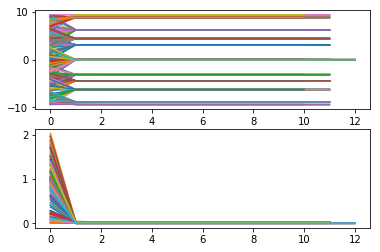

In [7]:
import mystic
mystic.log_reader('log.txt')

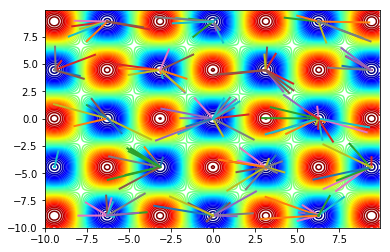

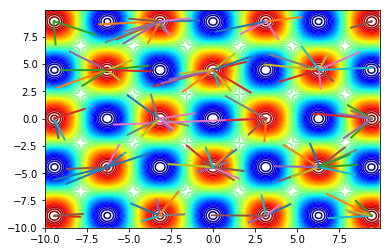

In [8]:
import mystic
mystic.model_plotter(mystic.models.griewangk, 'log.txt', bounds="-10:10:.1, -10:10:.1")
mystic.model_plotter(mystic.models.griewangk, 'inv.txt', bounds="-10:10:.1, -10:10:.1")

* Energy-surface interpolation

In short, for a unknown N-dimensional function, if one performs a global search for all mimima and all maxima... and saves the function evaluations to a database/cache, interpolation from the solver trajectories should interpolate more truly to the unknown function than a standard gridsearch.  Optimizers seek critical points, so those will be much better represented in the post-global search interpolation as opposed to post-gridding interpolation. 

**EXERCISE:** Convert one of our previous `mystic` examples to use parallel computing.  Note that if the solver has a `SetMapper` method, it can take a parallel map.

Let's now look at solvers for [optimization of probabilities](statistics.ipynb), PDFs, etc